In [182]:
#imports :

import pandas as pd # pandas pour la manipulation de données 
import numpy as np # numpy pour certaines operations sur les series
import plotly.express as px # plotly express pour des representations graphiques interactives

# extra librairies de visionnage
import plotly.graph_objects as go

%matplotlib inline
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv(f"data/netflix_titles.csv",encoding="utf8",sep=",")
df1 = df.assign(Platform = 'Netflix')
#display(df1.head()) 
df1.to_csv('data/netflix.csv', index=False)

In [184]:
df = pd.read_csv(f"data/amazon_prime_titles.csv",encoding="utf8",sep=",")
df2 = df.assign(Platform = 'Amazon Prime')
#display(df2.head()) 
df2.to_csv('data/amazon.csv', index=False)


In [185]:
df= pd.read_csv(f"data/disney_plus_titles.csv",encoding="utf8",sep=",")
df3 = df.assign(Platform = 'Disney+')
# display(df3.head()) 
df3.to_csv('data/disney.csv', index=False)

In [186]:
# merging three csv files
df = pd.concat(
    map(pd.read_csv, ['data/netflix.csv', 'data/amazon.csv','data/disney.csv']), ignore_index=True)
display(df)
df.to_csv('data/db.csv', index=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney+
19921,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney+
19922,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney+
19923,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney+


In [187]:
df = df.drop(columns=["description","show_id"],errors="ignore")
display(df)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Platform
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Netflix
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Netflix
...,...,...,...,...,...,...,...,...,...,...,...
19920,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Disney+
19921,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Disney+
19922,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama",Disney+
19923,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Disney+


In [188]:
def plot_bar_uncat(df,category,measure,orientation="v"):
    fig = fig = px.bar(df.groupby([category]).mean().sort_values(by=[measure],ascending= False).reset_index(),y=measure, color=category,width=1400, height=400,orientation = orientation)
    fig.show()

6131 2676 7814 1854 1052 398


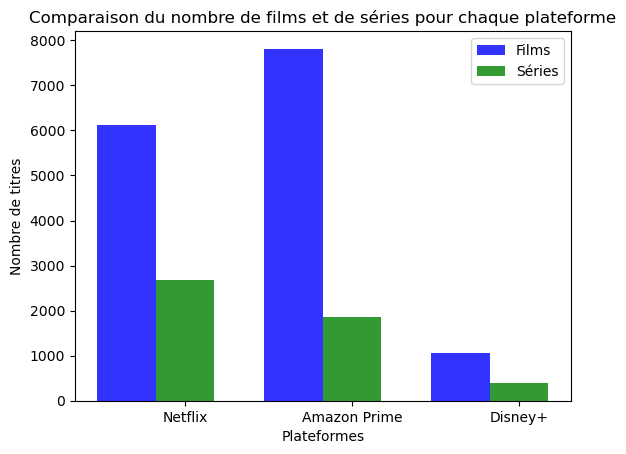

In [189]:

nbrmn = df[(df['type'] == 'Movie') & (df['Platform'] == 'Netflix')].shape[0]
nbrtn = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Netflix')].shape[0]
nbrma = df[(df['type'] == 'Movie') & (df['Platform'] == 'Amazon Prime')].shape[0]
nbrta = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Amazon Prime')].shape[0]
nbrmd = df[(df['type'] == 'Movie') & (df['Platform'] == 'Disney+')].shape[0]
nbrtd = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Disney+')].shape[0]


print(nbrmn, nbrtn, nbrma, nbrta, nbrmd, nbrtd)


labels = ['Netflix', 'Amazon Prime', 'Disney+']
movies = [nbrmn, nbrma, nbrmd]
tv_shows = [nbrtn, nbrta, nbrtd]
x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, movies, bar_width,alpha=opacity, color='b',label='Films')

rects2 = ax.bar([xi + bar_width for xi in x], tv_shows, bar_width,alpha=opacity, color='g',label='Séries')

# ajouter les étiquettes et les légendes
ax.set_xlabel('Plateformes')
ax.set_ylabel('Nombre de titres')
ax.set_title('Comparaison du nombre de films et de séries pour chaque plateforme')
ax.set_xticks([xi + bar_width for xi in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#refaire ça avec df1, df2 et df3 pour ensuite juste compter les lignes



In [ ]:
#nombre de comédies
nbr_com_n = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_com_a = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_com_d = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Disney+')].shape[0]

#documentaires
nbr_doc_n = df[(df.listed_in.str.contains('Documentaries') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_doc_a = df[(df.listed_in.str.contains('Documentary') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_doc_d = df[(df.listed_in.str.contains('Documentary') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Disney+')].shape[0]

#drama
nbr_doc_n = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_doc_a = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_doc_d = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Disney+')].shape[0]
